## Importing dependencies

In [1]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aiofiles                      23.1.0
aiohttp                       3.8.1
aiosignal                     1.3.1
alabaster                     0.7.12
altair                        5.0.1
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
annotated-types               0.5.0
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
back

In [102]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import os
import numpy as np

import cv2
import imghdr

import matplotlib.pyplot as plt

In [7]:
cv2.imread('data/happy/05-12-21-happy-people.jpg')

array([[[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [241, 238, 240],
        [241, 238, 240],
        [241, 238, 240]],

       [[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [241, 238, 240],
        [241, 238, 240],
        [241, 238, 240]],

       [[216, 215, 217],
        [216, 215, 217],
        [216, 215, 217],
        ...,
        [241, 238, 240],
        [241, 238, 240],
        [241, 238, 240]],

       ...,

       [[157, 131,  84],
        [165, 139,  92],
        [172, 148, 102],
        ...,
        [191, 189, 181],
        [191, 189, 181],
        [191, 189, 181]],

       [[162, 136,  89],
        [170, 144,  97],
        [177, 153, 107],
        ...,
        [191, 189, 181],
        [191, 189, 181],
        [191, 189, 181]],

       [[159, 133,  86],
        [169, 143,  96],
        [178, 154, 108],
        ...,
        [191, 189, 181],
        [191, 189, 181],
        [191, 189, 181]]

In [3]:
os.path.join('data', 'happy')

'data\\happy'

In [4]:
# Avoids OOM error by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
cpus = tf.config.experimental.list_physical_devices('CPU')
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## Removing dodgy images

In [9]:
data_dir = 'data'

In [10]:
os.listdir(data_dir)

['happy', 'sad']

In [11]:
os.listdir(os.path.join(data_dir, 'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_176864699_2rY3V6rmOJ2EexazQGd1NnOnCherr6Sk.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '20150708124649-simple-secret-happy-life-woman-enjoy-joy.jpeg',
 '343515-worldhappinessreport1440.jpg',
 '35438_hd.jpg',
 '41740_hd.jpg',
 '56f455011e0000b300705475.jpeg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '988689_Wallpaper2.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'A_Sep20_14_1189155141.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 'GettyImages-871518740.jpg',
 'getty_107808334_121413.jpg',
 'getty_107808336_9708069704500170_50554.jpg',
 'getty_143919450_9706479704500104_51510.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'getty_49458182

In [12]:
image_exts = ['jpg', 'jpeg', 'png', 'bmp']

In [13]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in exts list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Image not in exts list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in exts list data\happy\happiness_thumbnail.jpg
Image not in exts list data\happy\Happy20People.jpg
Image not in exts list data\happy\traitshappypeople.jpg
Image not in exts list data\sad\1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Image not in exts list data\sad\african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in exts list data\sad\depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in exts list data\sad\depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg
Image not in exts list data\sad\depositphotos_4584891-stock-photo-sad-man-in-a-empty.jpg
Image not in exts list data\sad\portrait-sad-man-260nw-126009806.jpg
Image not in exts list data\sad\sad-man-pictures-kjxgtb0t0ijlimlj.jpg
Image not in exts list data\sad\Sad-man-sitting-in-bedroom-thumbnail-732x549.jpg
Image not in exts list data\sad\sad-person-picture

## Load data

In [46]:
tf.data.Dataset??

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 277 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
data_iterator

In [28]:
batch = data_iterator.next()

In [29]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [30]:
# Image labels
batch[1].shape

(32,)

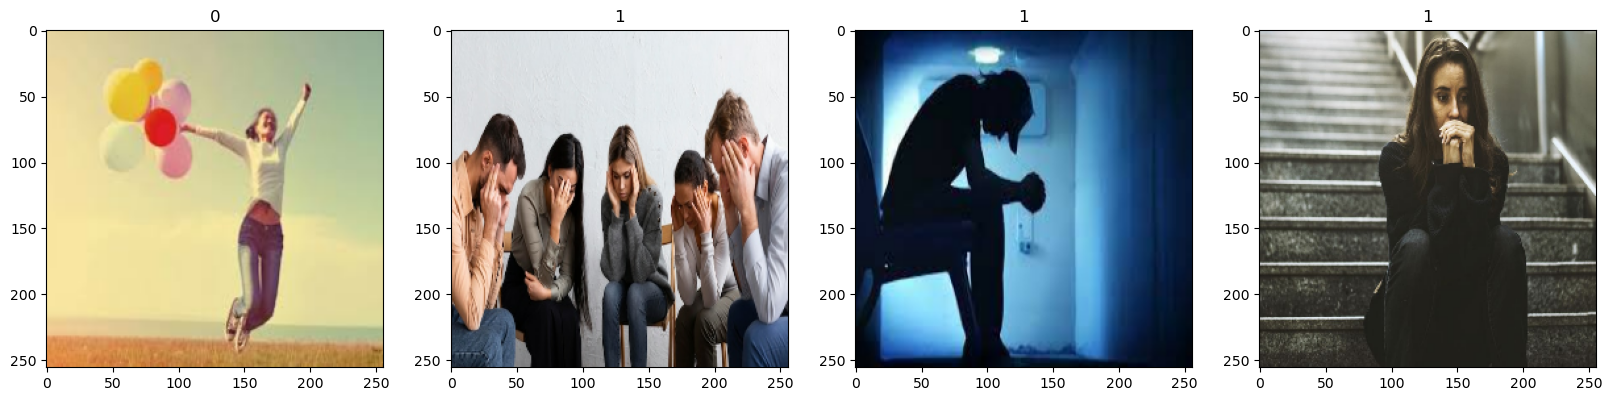

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [34]:
# Class 1 -> Sad
# Class 0 -> Happy

In [35]:
batch[0].min()

0.0

In [36]:
batch[0].max()

255.0

## Preprocessing the data

### Scaling the data

In [37]:
data = data.map(lambda x, y: (x/255, y))

In [40]:
scaled_iterator = data.as_numpy_iterator()

In [42]:
scaled_iterator.next()[0].max()

1.0

### Splitting the data

In [43]:
len(data)

9

In [48]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2) + 1
test_size = int(len(data) * .1) + 1

In [49]:
val_size

2

In [50]:
train_size

6

In [51]:
test_size

1

In [52]:
train_size + val_size + test_size

9

In [54]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Deep Model

### Build Deep Learning Model

In [55]:
model = Sequential()

In [57]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [58]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Train

In [73]:
logdir = 'logs'

In [74]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [75]:
history = model.fit(train, epochs=20, validation_data = val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 7s 733ms/step - loss: 0.8824 - accuracy: 0.4948 - val_loss: 0.6699 - val_accuracy: 0.4688
Epoch 2/20
6/6 [==============================] - 5s 645ms/step - loss: 0.6308 - accuracy: 0.6406 - val_loss: 0.5615 - val_accuracy: 0.7812
Epoch 3/20
6/6 [==============================] - 5s 620ms/step - loss: 0.5534 - accuracy: 0.7344 - val_loss: 0.3991 - val_accuracy: 0.9062
Epoch 4/20
6/6 [==============================] - 5s 633ms/step - loss: 0.4384 - accuracy: 0.7656 - val_loss: 0.3346 - val_accuracy: 0.9531
Epoch 5/20
6/6 [==============================] - 5s 618ms/step - loss: 0.3287 - accuracy: 0.8958 - val_loss: 0.3487 - val_accuracy: 0.8438
Epoch 6/20
6/6 [==============================] - 6s 865ms/step - loss: 0.2990 - accuracy: 0.8854 - val_loss: 0.2986 - val_accuracy: 0.8438
Epoch 7/20
6/6 [==============================] - 6s 768ms/step - loss: 0.2793 - accuracy: 0.8854 - val_loss: 0.1562 - val_accuracy: 0.9531
Epoch 8/20
6/6 [====

In [80]:
history.history['val_accuracy']

[0.46875,
 0.78125,
 0.90625,
 0.953125,
 0.84375,
 0.84375,
 0.953125,
 0.96875,
 0.96875,
 1.0,
 0.984375,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

### Plot Performance

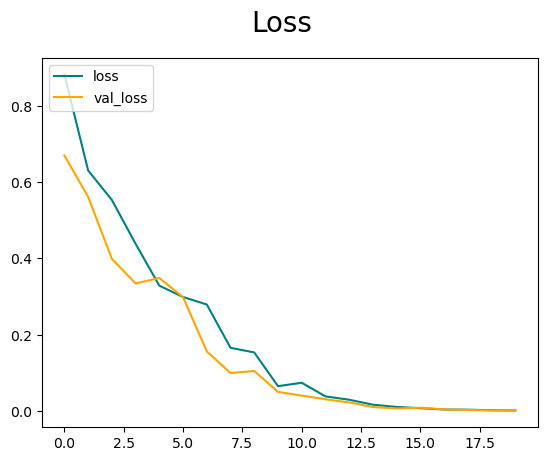

In [83]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

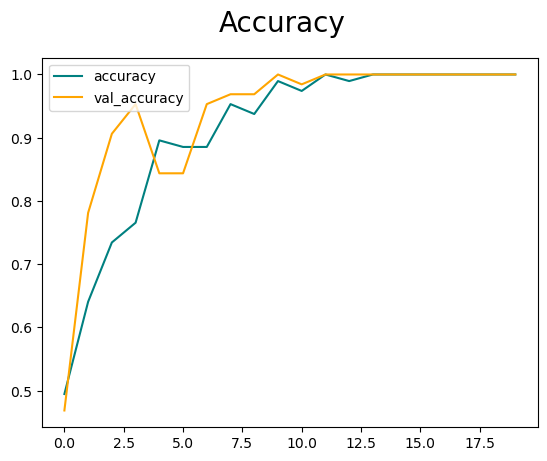

In [84]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Evaluate Performance

### Evaluate

In [86]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [87]:
precision = Precision()
recall = Recall()
accuracy = BinaryAccuracy()

In [88]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 319ms/step


In [91]:
print(f"Accuracy={accuracy.result()*100}%\nPrecision={precision.result()*100}%\nRecall={recall.result()*100}%")

Accuracy=100.0%
Precision=100.0%
Recall=100.0%


## Save the model

In [124]:
from tensorflow.keras.models import load_model

In [125]:
model.save(os.path.join('models', 'image_sentiment_classifier.h5'))

In [126]:
new_model = load_model(os.path.join('models', 'image_sentiment_classifier.h5'))

In [127]:
new_model